Here we evaluate how well a particular clustering captures aspects of the text by using "aspect patterns" in the form of regular expressions that flag passages related to a particular aspect (which could be a topic, applicatioon domain, semantic framework, etc.). Clusterings that capture an aspect well will concentrate instances of that aspect in a smaller number of clusters than those that do not capture the aspect well, in which the aspect instances ahould be more randomly distrubuted. We use entropy metrics to quantify the degree of concentration of the aspect pattern across the clusters.

In [1]:
import regex, os, sys
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from utils import utils

POS_CLUSTER_FILE = "dolly_pos_clusters.parquet"

In [41]:
# Patterns are the same ones used in "Aspect-aware semantic clustering".

from text_patterns import patterns

Note that the 'alternatives' pattern was discovered by POS n-gram clustering, so we expect that it may be more concentrated in the POS clusters than in other clusterings.

In [42]:
# # TEMP
# SENTENCE_TRANSFORMER_MODEL_NAME = 'all-MiniLM-L6-v2'
# dolly_data = pd.read_parquet(f'dolly_data_{SENTENCE_TRANSFORMER_MODEL_NAME}.parquet')
# len(dolly_data)

# find patterns in instructions
df = pos_data.copy()
text_col = 'instruction'
for pattern_name in patterns:
    flag_vector = [bool(regex.search(patterns[pattern_name], sent, regex.IGNORECASE)) for sent in df[text_col]]
    print(pattern_name, sum(flag_vector))
    # df[f"{pattern_name}_flag"] = flag_vector

# flag_cols = [col for col in df.columns if col.endswith('_flag')]
# df[flag_cols].sum(axis=0)

cars 536
animals 694
food 233
programming_language 24
sports 343
science 21
science_fiction 17
data_science 141
information_technology 155
books 218
identify 2351
how_does 296
why_is 286
what is 3656
extract 121
of_the_following 467
given_text 828
alternatives 4180
output_format 323


In [3]:
pos_data = pd.read_parquet(POS_DATA_FILE)

pos_data

,instruction,context,response,category,has_context,instruction_vector,response_vector,instruction_A,instruction_B,response_A,response_B,instruction_pos,pos_tfidf_PCs,pos__A,pos__B,pos__C,pos__D,pos__E,pos__F
8262,"Evaluate the below poem ""since feeling is firs...",since feeling is first\nwho pays any attention...,"Since feeling is first is a love poem, written...",summarization,True,"[-0.1521465927362442, -0.008405744098126888, 0...","[-0.2481917142868042, -0.18497240543365479, 0....",inst_A12,inst_B54,resp_A11,resp_B41,verb det adj noun punct sconj noun aux adj pun...,"[-0.019829241848485096, -0.025159141310967248,...",pos__A1,pos__B01,pos__C001,pos__D001,pos__E001,pos__F0001
6581,Write a beautiful bedtime 5 paragraph story fo...,,On a sunny morning Jonny wake up excited. Toda...,creative_writing,False,"[0.06535571068525314, 0.2363889217376709, -0.0...","[0.09430385380983353, -0.14183630049228668, 0....",inst_A12,inst_B53,resp_A11,resp_B42,verb det adj noun num noun noun adp det num no...,"[-0.02479504536129288, -0.03597920019845785, -...",pos__A1,pos__B01,pos__C001,pos__D001,pos__E001,pos__F0001
546,"From this summary, list three ways in which ar...",The book is divided into three sections: Proph...,"In the first section, Prophecy, the author tal...",summarization,True,"[-0.25081905722618103, -0.2955627143383026, -0...","[-0.16340360045433044, -0.06228034570813179, -...",inst_A11,inst_B50,resp_A06,resp_B20,adp det noun punct verb num noun adp pron adj ...,"[-0.019782082206258062, -0.020832560983279427,...",pos__A1,pos__B01,pos__C001,pos__D001,pos__E001,pos__F0002
14711,Classify the movies based on their genre.\nThe...,,"Action - Die Hard, No time to Die\nHorror - An...",classification,False,"[-0.03803395852446556, -0.4851337969303131, -0...","[-0.014729999005794525, -0.3509517312049866, -...",inst_A02,inst_B07,resp_A17,resp_B72,verb det noun verb adp pron noun punct space d...,"[-0.014832534724714994, -0.01270659777435571, ...",pos__A1,pos__B01,pos__C001,pos__D001,pos__E001,pos__F0002
8577,What herbs can I easily grow in my garden?,,"Basil, Parsley, Rosemary and Sage are all easy...",brainstorming,False,"[0.06953909993171692, 0.027184585109353065, -0...","[0.1225050836801529, -0.29661405086517334, -0....",inst_A17,inst_B80,resp_A05,resp_B16,det noun aux pron adv verb adp pron noun punct,"[-0.012299925449260968, -0.013475347276416099,...",pos__A1,pos__B01,pos__C001,pos__D001,pos__E001,pos__F0003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,Who is Rentala Madhubala,,Rentala Madhubala is an Indian scientist who s...,open_qa,False,"[-0.05267738178372383, 0.22396819293498993, -0...","[-0.29123547673225403, 0.11066368222236633, -0...",inst_A04,inst_B13,resp_A19,resp_B85,pron aux propn propn,"[-0.04701284055125622, -0.059535275683943185, ...",pos__A9,pos__B73,pos__C129,pos__D238,pos__E571,pos__F1540
7183,What is Anandapuram mandal,Anandapuram mandal is one of the 46 mandals in...,Anandapuram mandal is one of the 46 mandals in...,summarization,True,"[0.4135861098766327, 0.26632794737815857, -0.7...","[0.39853495359420776, -0.20568400621414185, -0...",inst_A05,inst_B18,resp_A19,resp_B85,pron aux propn propn,"[-0.04701284055125622, -0.059535275683943185, ...",pos__A9,pos__B73,pos__C129,pos__D238,pos__E571,pos__F1540
289,Extract what is Top Gun,The United States Navy Strike Fighter Tactics ...,The United States Navy Fighter Weapons School ...,information_extraction,True,"[-0.19165799021720886, 0.7255740165710449, -0....","[-0.05825274437665939, 0.1654198318719864, -0....",inst_A07,inst_B27,resp_A19,resp_B86,verb pron aux propn propn,"[-0.04701284055125622, -0.059535275683943185, ...",pos__A9,pos__B73,pos__C129,pos__D238,pos__E571,pos__F1540
12088,What is Dharma Sabha,Dharma Sabha was formed in 1830 in Calcutta by...,The Dharma Sabha was formed in 1830 in Calcutt...,information_extraction,True,"[0.18077321350574493, 0.4212815463542938, -0.8...","[-0.1071198359131813, 0.19154483079910278, -0....",

In [46]:
# find patterns in instructions

text_col = 'instruction'
for pattern_name in patterns.keys():
    pattern = patterns[pattern_name]
    flag_vector = [bool(regex.search(pattern, sent, regex.IGNORECASE)) for sent in pos_data[text_col]]
    # print(pattern_name, sum(flag_vector))
    pos_data[f"{pattern_name}_flag"] = flag_vector

flag_cols = [col for col in pos_data.columns if col.endswith('_flag')]
pos_data[flag_cols].sum(axis=0)

cars_flag                       536
animals_flag                    694
food_flag                       233
programming_language_flag        24
sports_flag                     343
science_flag                     21
science_fiction_flag             17
data_science_flag               141
information_technology_flag     155
books_flag                      218
identify_flag                  2351
how_does_flag                   296
why_is_flag                     286
what is_flag                   3656
extract_flag                    121
of_the_following_flag           467
given_text_flag                 828
alternatives_flag              4180
output_format_flag              323
dtype: int64

In [57]:
# integerify = lambda x: int(re.sub(r'[^0-9]', '', str(x)))

def integerify(x):
    digits = regex.sub(r'[^0-9]', '', str(x))
    num = int(digits) if len(digits) > 0 else -1
    return num

# integerify('')

def pattern_distribution_by_cluster(df, pattern_name, pattern_lookup, text_col, cluster_col):
    import re
    # integerify = lambda x: int(re.sub(r'[^0-9]', '', str(x))) # extract digits from variable as integer
    pattern = pattern_lookup[pattern_name]
    flags = [bool(regex.search(pattern, sent, regex.IGNORECASE)) for sent in df[text_col]]
    xtab = pd.crosstab(df[cluster_col], flags)
    xtab['pattern'] = pattern_name
    xtab['cluster_col'] = cluster_col
    xtab['frequency'] = [ row[True]/(row[True] + row[False]) for row in xtab.to_dict(orient='records') ]
    xtab['overall_count'] = np.sum(flags)
    xtab['overall_frequency'] = np.sum(flags)/len(flags)
    xtab['lift'] = [ row['frequency']/row['overall_frequency'] for row in xtab.to_dict(orient='records') ]
    xtab['cluster_number'] = [integerify(cluster_col) for i in xtab.index]
    return xtab


def get_all_pattern_distributions_by_cluster(df, pattern_lookup, text_col, cluster_col):
    pattern_distribution_pdf = pd.concat([pattern_distribution_by_cluster(df, pattern_name, pattern_lookup, text_col, cluster_col)
                for pattern_name in pattern_lookup.keys()], axis=0)
    # pattern_lift_pdf.columns = pattern_lookup.keys()
    # pldf = pattern_lift_pdf.reset_index(drop=False).rename(columns={cluster_col:'cluster'})
    return pattern_distribution_pdf


def plot_pattern_distribution(pd_pdf, my_stat='frequency'):
    # aplbc_long = pd.melt(aplbc_pdf, id_vars=['cluster'], var_name='pattern', value_name='cluster_lift')
    
    sns.set(rc={"figure.figsize":(5, 0.3 * len(set(pd_pdf['pattern'])))})
    ax = sns.stripplot(x=my_stat, y='pattern', data=pd_pdf, jitter=True, hue='pattern', dodge=True, legend=False)
    ax.set(ylabel=None)
    ax.set(title=f"Pattern {my_stat} across clusters")
    plt.show()

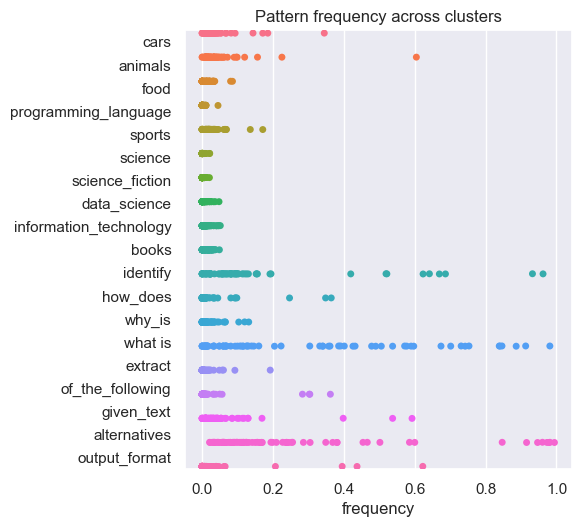

In [58]:
pos_pattern_distributions = get_all_pattern_distributions_by_cluster(pos_data, patterns, 'instruction', 'pos__B')
plot_pattern_distribution(pos_pattern_distributions, 'frequency')

# Use k-means to get the same number of clusters

In [59]:
from sklearn.cluster import KMeans

n_clusters = 20
seed=0
semantic_kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit( [v for v in pos_data['instruction_vector']])
pos_kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit( [v for v in pos_data['pos_tfidf_PCs']])

pos_data['semantic_kmeans'] = semantic_kmeans.labels_
pos_data['pos_kmeans'] = pos_kmeans.labels_

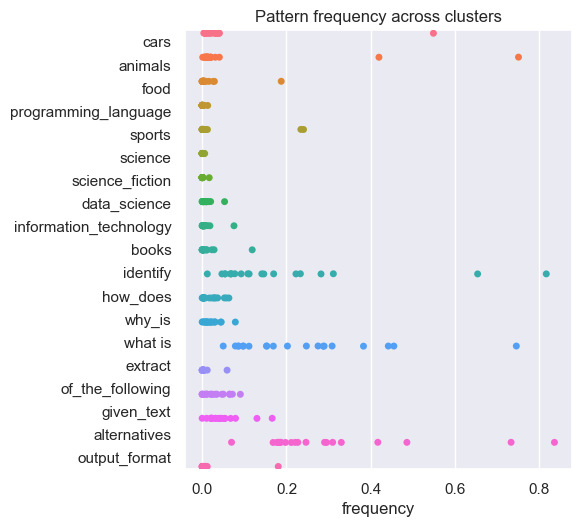

In [60]:
semantic_kmeans_pattern_distributions = get_all_pattern_distributions_by_cluster(pos_data, patterns, 'instruction', 'semantic_kmeans')
plot_pattern_distribution(semantic_kmeans_pattern_distributions, 'frequency')

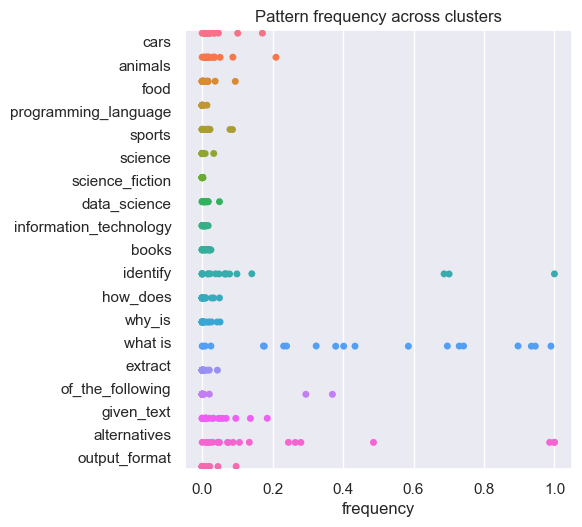

In [61]:
pos_kmeans_pattern_distributions = get_all_pattern_distributions_by_cluster(pos_data, patterns, 'instruction', 'pos_kmeans')
plot_pattern_distribution(pos_kmeans_pattern_distributions, 'frequency')

# Compare semantic clusters to POS clusters

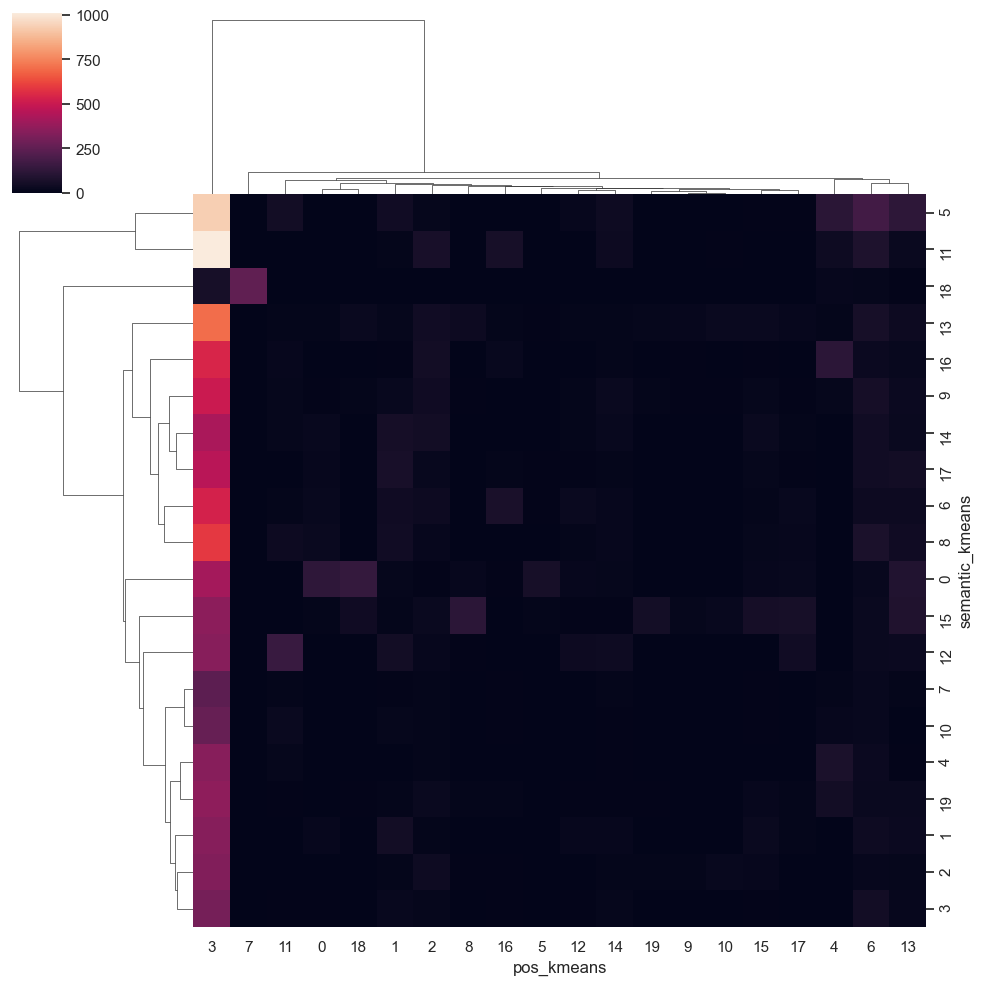

In [56]:
sem_pos_xtab = pd.crosstab(pos_data['semantic_kmeans'] , pos_data['pos_kmeans'])
sns.clustermap(sem_pos_xtab)

# To Do

Measure the spread of pattern frequency across clusters as a type of entropy (or whatever).

Show that by down-weighting the semantic vector dimensions indicative of framework aspects we get more focused distribution of domain aspects across clusters (lower entropy).